### Decision Treem

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision/

In [2]:
# load the iris data
df = pd.read_csv('iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df['species_label'], _ = pd.factorize(df['species'])
df['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [4]:
df

,sepal.length,sepal.width,petal.length,petal.width,species,species_label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [5]:
# select features
y = df['species_label'] #Dependent feature
X = df[['sepal.length', 'sepal.width']] #Independent features (subset)

In [6]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3, random_state=0)

In [7]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [8]:
y_pred = dtree.predict(X_test)

In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.67


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 1  5 12]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.71      0.28      0.40        18
           2       0.43      0.82      0.56        11

    accuracy                           0.67        45
   macro avg       0.69      0.70      0.64        45
weighted avg       0.73      0.67      0.64        45



[Text(0.4583333333333333, 0.875, 'x[0] <= 5.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'x[1] <= 2.75\nentropy = 0.605\nsamples = 35\nvalue = [31, 3, 1]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 4.7\nentropy = 1.371\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 5.85\nentropy = 1.2\nsamples = 70\nvalue = [3.0, 29.0, 38.0]'),
 Text(0.5, 0.375, 'x[1] <= 3.25\nentropy = 1.149\nsamples = 21\nvalue = [3, 15, 3]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.65\nsamples = 18\nvalue = [0, 15, 3]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 7.05\nentropy = 0.863\nsamples = 49\nvalue = [0, 14, 35]'),
 Text(0.

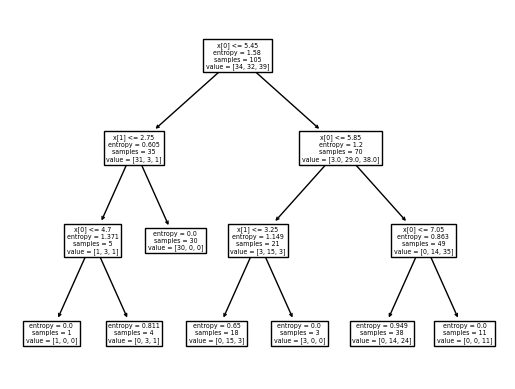

In [11]:
tree.plot_tree(dtree)

[Text(0.4583333333333333, 0.875, 'x[0] <= 5.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'x[1] <= 2.75\nentropy = 0.605\nsamples = 35\nvalue = [31, 3, 1]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 4.7\nentropy = 1.371\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 5.85\nentropy = 1.2\nsamples = 70\nvalue = [3.0, 29.0, 38.0]'),
 Text(0.5, 0.375, 'x[1] <= 3.25\nentropy = 1.149\nsamples = 21\nvalue = [3, 15, 3]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.65\nsamples = 18\nvalue = [0, 15, 3]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 7.05\nentropy = 0.863\nsamples = 49\nvalue = [0, 14, 35]'),
 Text(0.

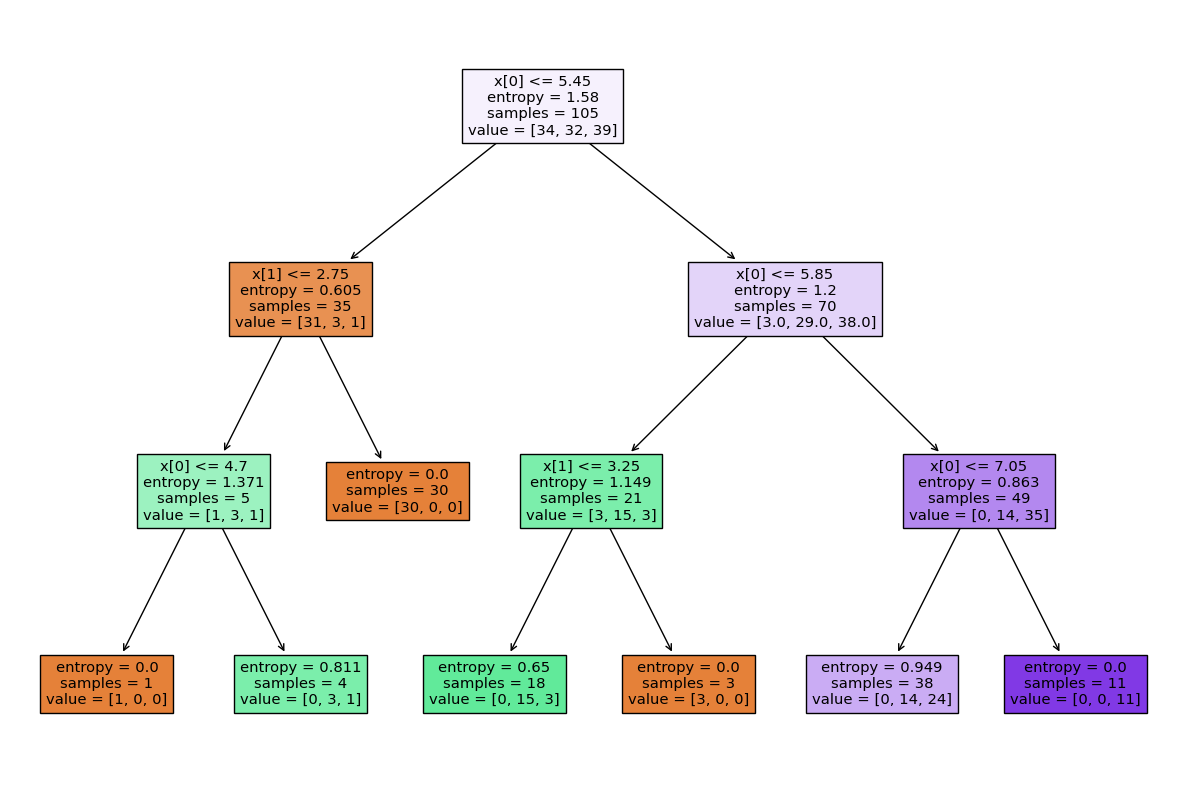

In [14]:
##Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

### Random forest

In [119]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [120]:
df=pd.read_csv("train.csv")

In [121]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [122]:
#Checking for missing data
#NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
#NAs[NAs.sum(axis=1) > 0]

In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df=df.drop(columns=["Name","Ticket","Cabin"])

In [125]:
# Filling missing Age values with mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [126]:
# Filling missing Embarked values with most common value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [127]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [128]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [129]:
df["Pclass"] = df["Pclass"].apply(str)

In [130]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [131]:
df.dtypes[df.dtypes == "object"].index

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

In [133]:
for col in df.dtypes[df.dtypes=="object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    

In [134]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.000000,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.000000,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.000000,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.000000,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,False,True,False,False,True,False,False,True
887,888,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,True
888,889,0,29.699118,1,2,23.4500,False,False,True,True,False,False,False,True
889,890,1,26.000000,0,0,30.0000,True,False,False,False,True,True,False,False


In [136]:
target = df.pop("Survived")

In [137]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.25)

In [140]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
y_pred=model_rfc.predict(x_test)

In [143]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7831681446704921

In [147]:
from sklearn import metrics

In [150]:
import seaborn as sns
cm=metrics.confusion_matrix(y_test,y_pred)

In [151]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

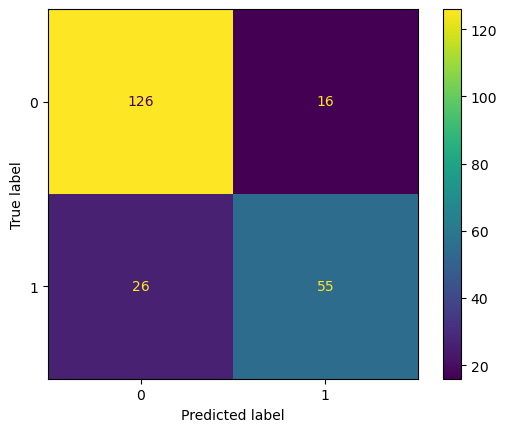

In [152]:
cm_display.plot()
plt.show()

### ADABOOST

In [1]:
#Importing neccesary packages
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [2]:
df=pd.read_csv("income.csv")

In [3]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [4]:
df.shape

(48842, 7)

In [5]:
df.iloc[: , :-1]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48837,39,215419,13,0,0,36
48838,64,321403,9,0,0,40
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [6]:
X=df.iloc[: , :-1]

In [7]:
y=df["income_level"]

In [8]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_level, dtype: int64

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Create adaboost classifer object
AdaModel = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = AdaModel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8385709898659024


#Important Parameters base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

n_estimators: Number of weak learners to train iteratively.

learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

### try with some different estimators , 

In [22]:
# Import Support Vector Classifier
from sklearn.linear_model import LogisticRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
logistric=LogisticRegression()

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=logistric,learning_rate=1)

In [23]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.806223769065411


Pros AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

### GradientBoost

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [22]:

housing_df = pd.read_csv('BostonHousing.csv')

In [23]:
housing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
y=housing_df['medv']
X=housing_df.drop('medv',axis=1)

In [28]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [38]:
gradientRegModel=GradientBoostingRegressor(max_depth=3,n_estimators=50,learning_rate=1.0)

In [39]:
model=gradientRegModel.fit(X_train,y_train)

In [40]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [41]:
r2_score(y_pred,y_test)

0.814914454033558

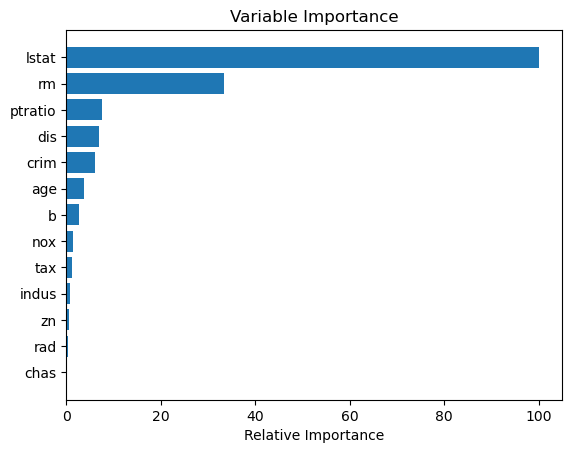

In [50]:


# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, housing_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [45]:
feature_importance

array([6.13780143e+00, 5.90315052e-01, 8.34623043e-01, 4.41594724e-02,
       1.49822547e+00, 3.34271776e+01, 3.63831518e+00, 6.81814884e+00,
       4.44476461e-01, 1.14377197e+00, 7.54926286e+00, 2.74217986e+00,
       1.00000000e+02])

In [51]:
from sklearn.model_selection import GridSearchCV


In [52]:
model

GradientBoostingRegressor(learning_rate=1.0, n_estimators=50)

sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [55]:
grid_params={"n_estimators" : [50,75,100,150,200] , "learning_rate" :[0.15,0.1,0.10,0.05] }

tuning=GridSearchCV(estimator=GradientBoostingRegressor() ,param_grid=grid_params ,scoring='r2')

tuning.fit(X_train,y_train)

tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 200}, 0.8728809232827116)

### XGBOOST